In [1]:
# Problem Statement: Insurance companies need to accurately predict the cost of health insurance for individuals to 
# set premiums appropriately. However, traditional methods of cost prediction often rely on broad actuarial tables 
# and historical averages, which may not account for the nuanced differences among individuals. By leveraging 
# machine learning techniques, insurers can predict more accurately the insurance costs tailored to individual profiles,
# leading to more competitive pricing and better risk management.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,make_scorer,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
df = pd.read_csv('insurance.csv')
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [ ]:
# The dataset has 986 rows and 11 columns. The columns have no null values in them.

In [6]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [ ]:
#The above table shows statistical analysis data for each column having its mean value, minimum value, 
# its 25,50 and 75th percentile values and then maximum values. Also count of how many data points in each column.

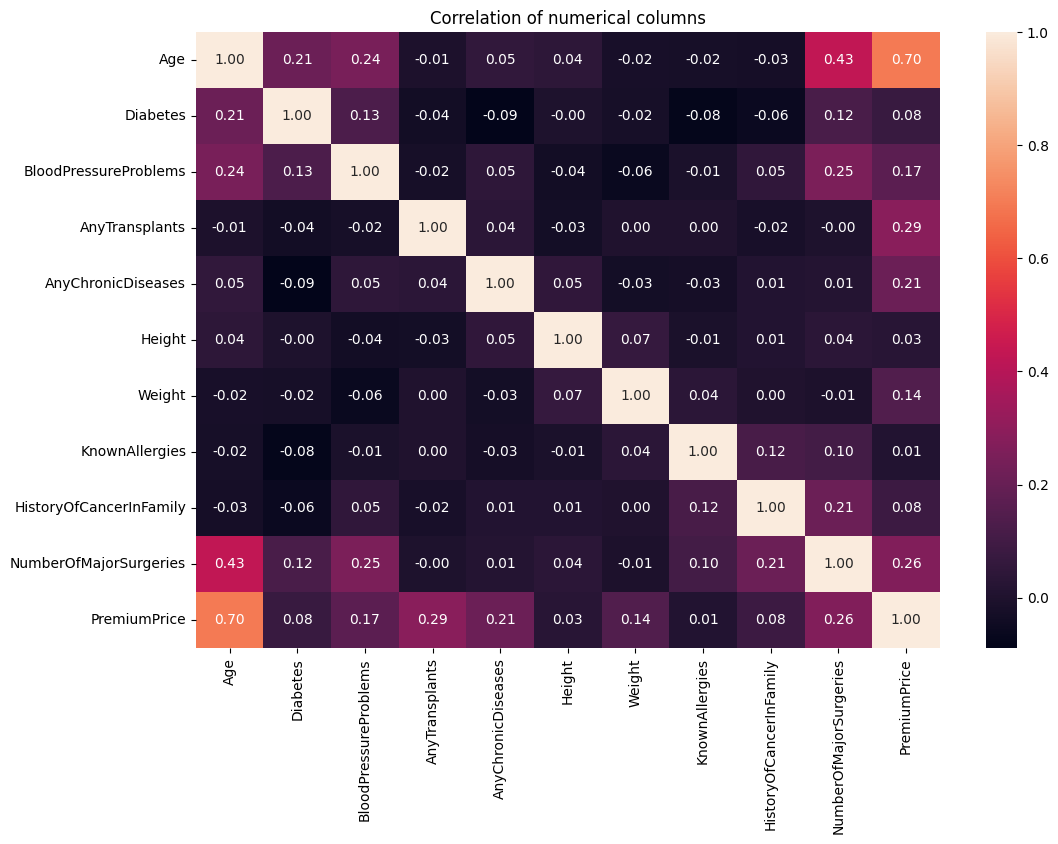

In [7]:
#Heatmap for Correlation of variables/columns:
v=df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(v,annot=True,fmt = '.2f')
plt.title('Correlation of numerical columns')
plt.show()

In [8]:
# There is high correlation between 1) Age-Premium Price and 2) Age - Number of major surgeries as shown in above heatmap.

In [9]:
# List of numerical columns
numerical_columns = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'PremiumPrice']

# Detect outliers using Z-score method
z_scores = np.abs(stats.zscore(df[numerical_columns]))

# Define different thresholds
threshold_3 = 3
threshold_3_5 = 3.5

# Identify outliers for threshold 3
outliers_3 = np.where(z_scores > threshold_3)

# Remove outliers for threshold 3
df_cleaned_3 = df[(z_scores < threshold_3).all(axis=1)]

df_cleaned_3

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
980,40,0,1,1,0,171,74,0,0,0,38000
981,18,0,0,0,0,169,67,0,0,0,15000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [10]:
# Identify outliers for threshold 3.5
outliers_3_5 = np.where(z_scores > threshold_3_5)

# Remove outliers for threshold 3.5
df_cleaned_3_5 = df[(z_scores < threshold_3_5).all(axis=1)]
df_cleaned_3_5

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [11]:
df_cleaned_3.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,41.437827,0.413793,0.471264,0.055381,0.185998,168.153605,76.269592,0.218391,0.118077,0.628004,24264.367816
std,13.743525,0.492770,0.499435,0.228843,0.389308,10.136950,13.202972,0.413370,0.322868,0.691830,6246.849829
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,52.000000,1.000000,1.000000,0.000000,0.000000,176.000000,86.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,119.000000,1.000000,1.000000,2.000000,40000.000000


In [12]:
df_cleaned_3_5.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,41.785933,0.419980,0.469929,0.056065,0.181448,168.190622,76.686035,0.215087,0.118247,0.667686,24339.449541
std,13.938606,0.493807,0.499349,0.230165,0.385585,10.115928,13.810500,0.411092,0.323065,0.748921,6239.273514
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,126.000000,1.000000,1.000000,3.000000,40000.000000


In [13]:
print(f"Number of outliers with threshold 3: {len(df) - len(df_cleaned_3)}")
print(f"Number of outliers with threshold 3.5: {len(df) - len(df_cleaned_3_5)}")

Number of outliers with threshold 3: 29
Number of outliers with threshold 3.5: 5


In [ ]:
# Outlier threshold 3 is chosen to give more accurate predictions on premiumns from the other variables given. 

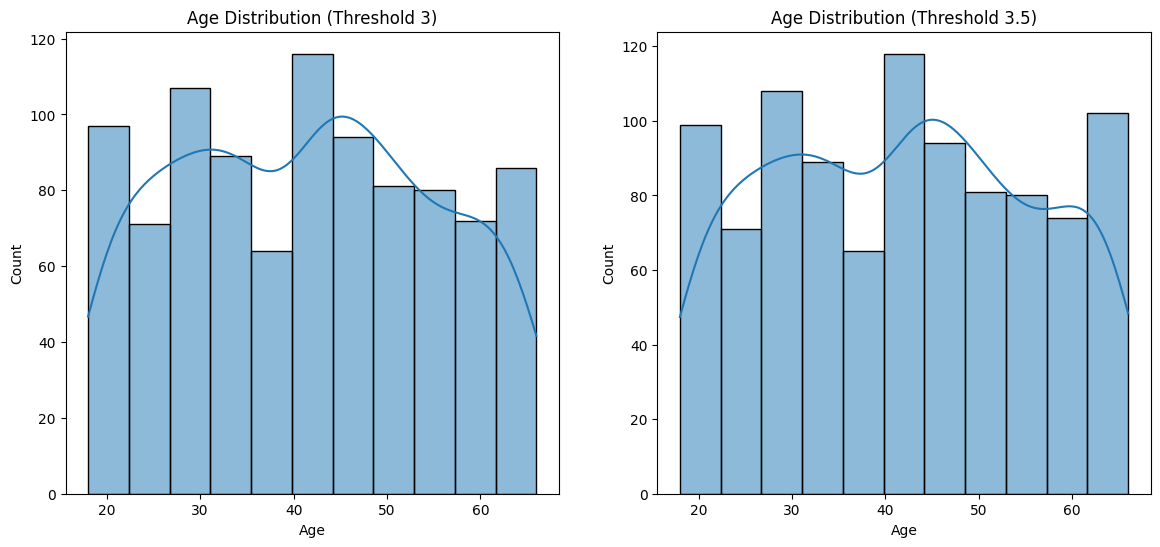

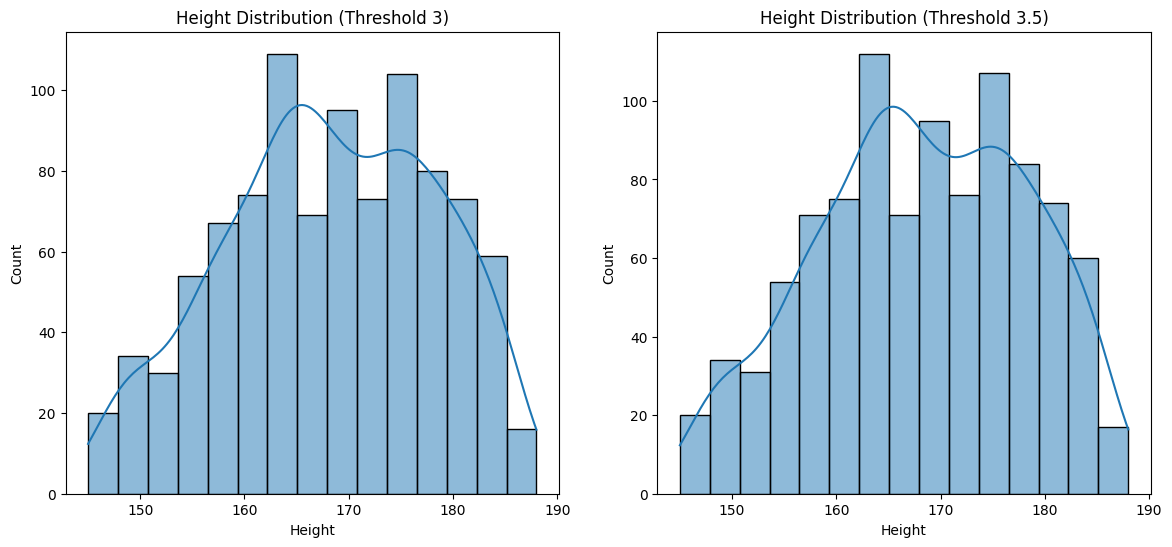

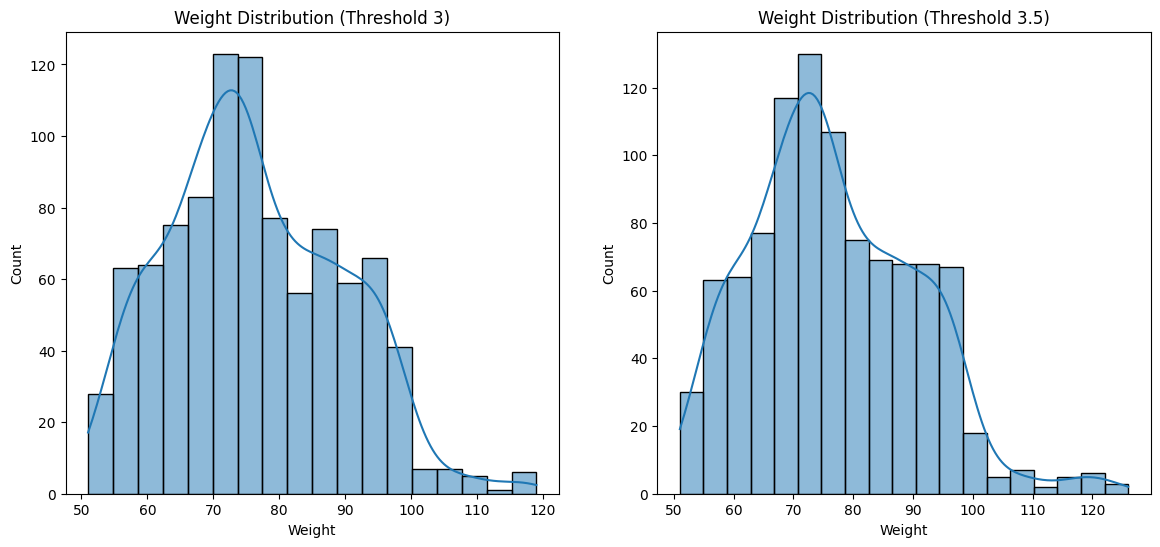

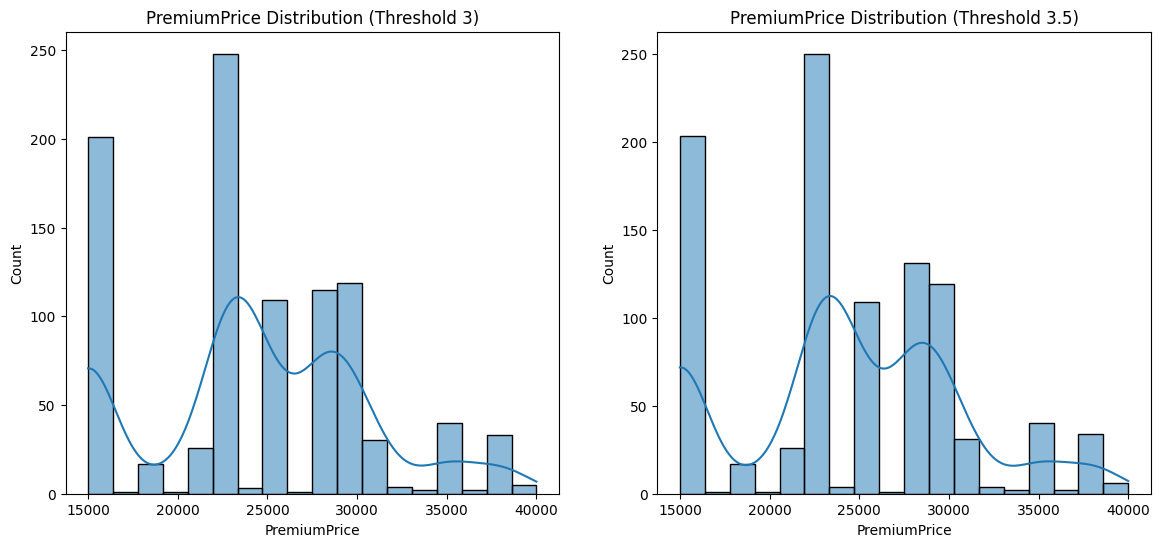

In [14]:
# Visual inspection of key variables
variables_to_plot = ['Age', 'Height', 'Weight', 'PremiumPrice']

for var in variables_to_plot:
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned_3[var], kde=True)
    plt.title(f'{var} Distribution (Threshold 3)')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df_cleaned_3_5[var], kde=True)
    plt.title(f'{var} Distribution (Threshold 3.5)')
    
    plt.show()

In [ ]:
# Above histogrms plots are comparison plots of same variable with different threshold of 3 and 3.5 and are found 
# to be almost similar.

In [91]:
# Extract the relevant columns
columns = ['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height', 'Weight', 
           'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice']

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned_3[columns])

# Create a DataFrame for the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns)

In [16]:
scaled_df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,0.259325,-0.840168,-0.944089,-0.242133,-0.478015,-1.298268,-1.460252,-0.528594,-0.365905,-0.908218,0.117822
1,1.351319,1.190238,-0.944089,-0.242133,-0.478015,1.169246,-0.247770,-0.528594,-0.365905,-0.908218,0.758480
2,-0.395872,1.190238,1.059222,-0.242133,-0.478015,-1.002167,-1.308692,-0.528594,-0.365905,0.537979,-0.202507
3,0.768922,1.190238,1.059222,-0.242133,2.091986,1.465348,1.267832,-0.528594,-0.365905,1.984176,0.598315
4,-0.250272,-0.840168,-0.944089,-0.242133,2.091986,-0.212562,0.888932,-0.528594,-0.365905,0.537979,-0.202507
...,...,...,...,...,...,...,...,...,...,...,...
952,-0.104673,-0.840168,1.059222,4.129964,-0.478015,0.280941,-0.171990,-0.528594,-0.365905,-0.908218,2.199959
953,-1.706264,-0.840168,-0.944089,-0.242133,-0.478015,0.083540,-0.702451,-0.528594,-0.365905,-0.908218,-1.483822
954,1.060120,-0.840168,1.059222,-0.242133,-0.478015,-1.298268,-0.399330,-0.528594,-0.365905,0.537979,0.758480
955,0.404924,1.190238,1.059222,-0.242133,-0.478015,-1.002167,-0.247770,1.891811,-0.365905,0.537979,2.360124


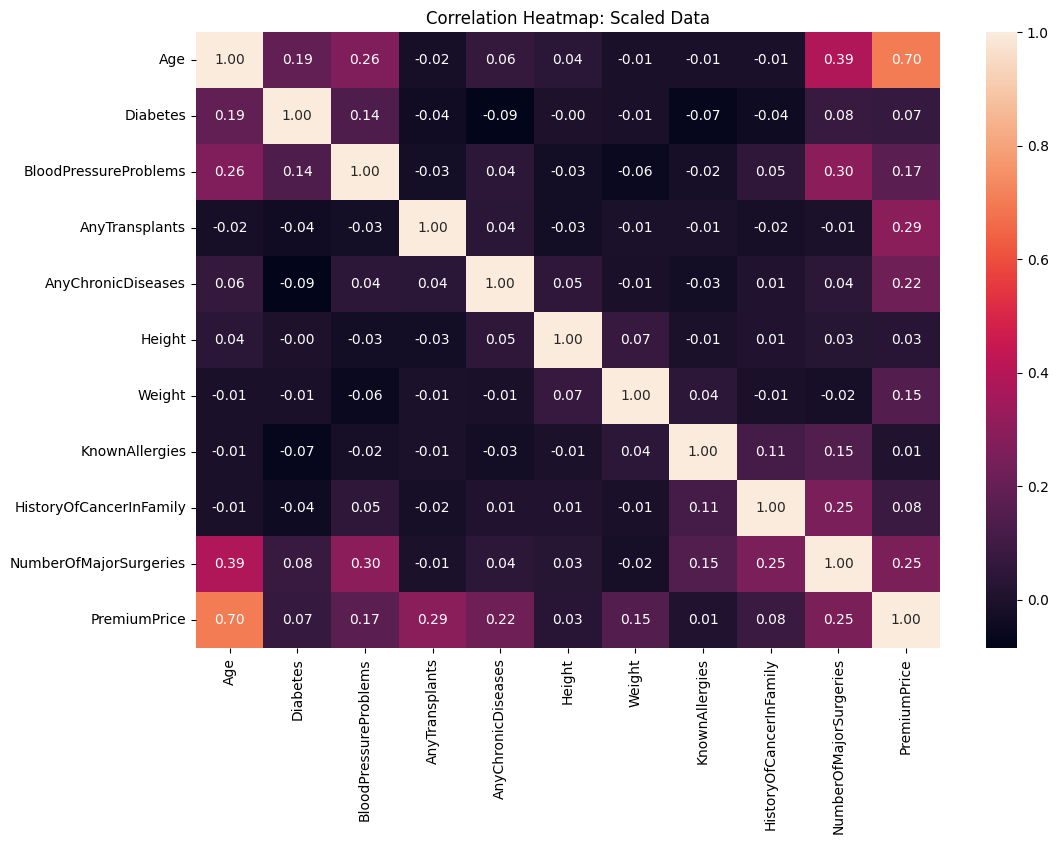

In [17]:
corr_matrix = scaled_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True,fmt='.2f')

# Add a title
plt.title('Correlation Heatmap: Scaled Data')

# Display the heatmap
plt.show()

In [18]:
#There is high correlation between Age-Premium Price only now after scaling the data.

# Hypothesis Testing

In [19]:
# Perform Pearson correlation test

#H0: There is no correlation between age and premium price.
#H1: There is a correlation between age and premium price.
    
correlation_coefficient, p_value = pearsonr(df_cleaned_3['Age'], df_cleaned_3['PremiumPrice'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between age and premium price.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between age and premium price.")

Pearson Correlation Coefficient: 0.7015949949405942
P-value: 1.0447703338239117e-142
Reject the null hypothesis: There is a significant correlation between age and premium price.


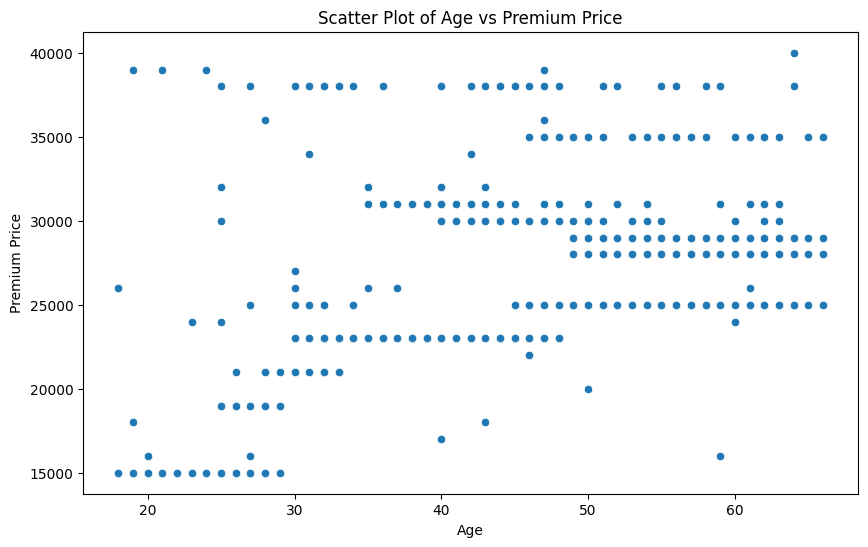

In [20]:
# Scatter plot to visualize the relationship between age and premium price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='PremiumPrice', data=df_cleaned_3)
plt.title('Scatter Plot of Age vs Premium Price')
plt.xlabel('Age')
plt.ylabel('Premium Price')
plt.show()

In [ ]:
# Here in scatter plot it shows roughly as age increases the premiums also increase but is same for certain age groups.

In [21]:
# Group data by the categorical variable (e.g., Diabetes)

#H0: There is no significant difference in premium prices across categories of the categorical variable (e.g., with and without diabetes).
#H1: There is a significant difference in premium prices across categories of the categorical variable.
    
group1 = df_cleaned_3[df_cleaned_3['Diabetes'] == 1]['PremiumPrice']
group2 = df_cleaned_3[df_cleaned_3['Diabetes'] == 0]['PremiumPrice']

# Perform t-test
t_statistic, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in premium prices between individuals with and without diabetes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in premium prices between individuals with and without diabetes.")

T-statistic: 2.1083874439817247
P-value: 0.03525745245686358
Reject the null hypothesis: There is a significant difference in premium prices between individuals with and without diabetes.


In [22]:
# Group data by the categorical variable (e.g.,Blood Pressure Problems)

#H0: There is no significant difference in premium prices across categories of the categorical variable (e.g., with and without BP problems).
#H1: There is a significant difference in premium prices across categories of the categorical variable.
    
group1 = df_cleaned_3[df_cleaned_3['BloodPressureProblems'] == 1]['PremiumPrice']
group2 = df_cleaned_3[df_cleaned_3['BloodPressureProblems'] == 0]['PremiumPrice']

# Perform t-test
t_statistic, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in premium prices between individuals with and without BP Problems.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in premium prices between individuals with and without BP Problems.")

T-statistic: 5.349802905099321
P-value: 1.1024518792137634e-07
Reject the null hypothesis: There is a significant difference in premium prices between individuals with and without BP Problems.


In [23]:
# Group data by the categorical variable (e.g.,Any Transplants)

#H0: There is no significant difference in premium prices across categories of the categorical variable (e.g., with and without Transplants).
#H1: There is a significant difference in premium prices across categories of the categorical variable.
    
group1 = df_cleaned_3[df_cleaned_3['AnyTransplants'] == 1]['PremiumPrice']
group2 = df_cleaned_3[df_cleaned_3['AnyTransplants'] == 0]['PremiumPrice']

# Perform t-test
t_statistic, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in premium prices between individuals with and without Transplants.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in premium prices between individuals with and without Transplants.")

T-statistic: 9.329781309507613
P-value: 7.19294884464435e-20
Reject the null hypothesis: There is a significant difference in premium prices between individuals with and without Transplants.


In [24]:
# Group data by the categorical variable (e.g.,Chronic Diseases)

#H0: There is no significant difference in premium prices across categories of the categorical variable (e.g., with and without Chronic Diseases).
#H1: There is a significant difference in premium prices across categories of the categorical variable.
    
group1 = df_cleaned_3[df_cleaned_3['AnyChronicDiseases'] == 1]['PremiumPrice']
group2 = df_cleaned_3[df_cleaned_3['AnyChronicDiseases'] == 0]['PremiumPrice']

# Perform t-test
t_statistic, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in premium prices between individuals with and without Chronic Diseases.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in premium prices between individuals with and without Chronic Diseases.")

T-statistic: 6.904386321211786
P-value: 9.186718789391516e-12
Reject the null hypothesis: There is a significant difference in premium prices between individuals with and without Chronic Diseases.


In [25]:
# Group data by the categorical variable (e.g.,Known Allergies)

#H0: There is no significant difference in premium prices across categories of the categorical variable (e.g., with and without known allergies).
#H1: There is a significant difference in premium prices across categories of the categorical variable.
    
group1 = df_cleaned_3[df_cleaned_3['KnownAllergies'] == 1]['PremiumPrice']
group2 = df_cleaned_3[df_cleaned_3['KnownAllergies'] == 0]['PremiumPrice']

# Perform t-test
t_statistic, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in premium prices between individuals with and without Known Allergies.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in premium prices between individuals with and without Known Allergies.")

T-statistic: 0.33484693206858634
P-value: 0.7378140856998932
Fail to reject the null hypothesis: There is no significant difference in premium prices between individuals with and without Known Allergies.


In [26]:
# Group data by the categorical variable (e.g.,history of Cancer in family)

#H0: There is no significant difference in premium prices across categories of the categorical variable (e.g., with and without history of cancer in family).
#H1: There is a significant difference in premium prices across categories of the categorical variable.
    
group1 = df_cleaned_3[df_cleaned_3['HistoryOfCancerInFamily'] == 1]['PremiumPrice']
group2 = df_cleaned_3[df_cleaned_3['HistoryOfCancerInFamily'] == 0]['PremiumPrice']

# Perform t-test
t_statistic, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in premium prices between individuals with and without History of cancer in family.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in premium prices between individuals with and without history of cancer in family.")

T-statistic: 2.5914669114379043
P-value: 0.009702608654041739
Reject the null hypothesis: There is a significant difference in premium prices between individuals with and without History of cancer in family.


In [27]:
group0 = df['PremiumPrice'][df['NumberOfMajorSurgeries'] == 0]
group1 = df['PremiumPrice'][df['NumberOfMajorSurgeries'] == 1]
group2 = df['PremiumPrice'][df['NumberOfMajorSurgeries'] == 2]
group3 = df['PremiumPrice'][df['NumberOfMajorSurgeries'] == 3]

# Check the sizes of each group
print(f"Group 0 size: {len(group0)}")
print(f"Group 1 size: {len(group1)}")
print(f"Group 2 size: {len(group2)}")
print(f"Group 3 size: {len(group3)}")

Group 0 size: 479
Group 1 size: 372
Group 2 size: 119
Group 3 size: 16


In [28]:
# Perform ANOVA only if all groups have data
if all(len(group) > 0 for group in [group0, group1, group2, group3]):
    # Perform ANOVA
    f_statistic, p_value = f_oneway(group0, group1, group2, group3)

    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")

    # Interpret the results
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference in premium prices across different numbers of surgeries.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in premium prices across different numbers of surgeries.")
else:
    print("One or more groups have no data points.")

F-statistic: 26.13539359740762
P-value: 2.8711631377228097e-16
Reject the null hypothesis: There is a significant difference in premium prices across different numbers of surgeries.


In [ ]:
# It is found that there is no significant difference in premiums for known allergies whether 0 or 1 but other health factors 
# do have significant difference in premiums especially for those whom there is presence of that particular health condition.

# Since the ANOVA test shows significant differences, the next step is to perform a post-hoc test to identify which specific groups differ from each other. The Tukey's HSD (Honestly Significant Difference) test is a commonly used method for this purpose.

In [29]:
# Prepare the data for the Tukey HSD test
data = df[['PremiumPrice', 'NumberOfMajorSurgeries']]

# Perform the Tukey HSD test
tukey = pairwise_tukeyhsd(endog=data['PremiumPrice'],
                          groups=data['NumberOfMajorSurgeries'],
                          alpha=0.05)

# Print the results
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     0      1 1773.2507 0.0001   702.2872 2844.2142   True
     0      2 5115.3489    0.0  3528.0508 6702.6469   True
     0      3 5031.3152 0.0058  1092.8776 8969.7529   True
     1      2 3342.0981    0.0  1710.0051 4974.1912   True
     1      3 3258.0645 0.1477  -698.6392 7214.7682  False
     2      3  -84.0336 0.9999 -4210.5402 4042.4729  False
----------------------------------------------------------


In [30]:
#Only in case of Known allergies there is no change in premium price whether it is there or not. But for other health factors 
#there are difference in premium price when it is there versus than it is not there. And obviously the Premium price will be
#more for when these health factors are present in a person.

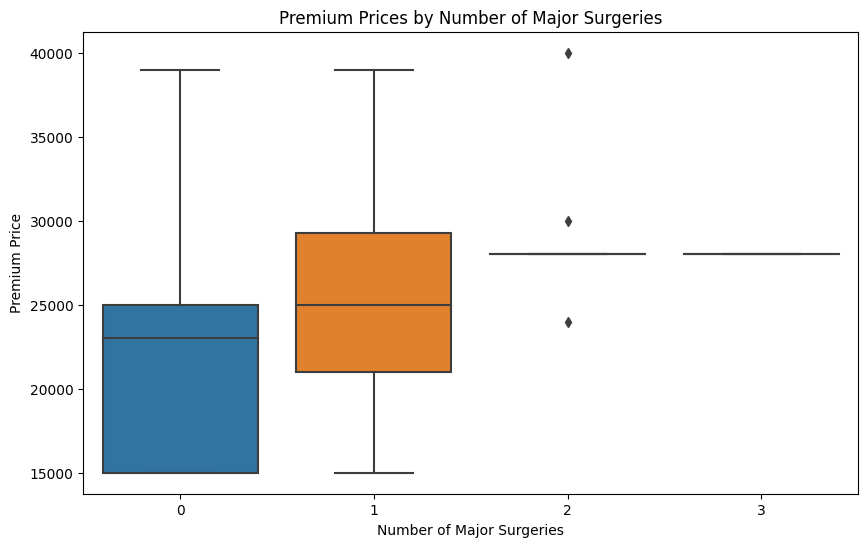

In [31]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='NumberOfMajorSurgeries', y='PremiumPrice', data=df)
plt.title('Premium Prices by Number of Major Surgeries')
plt.xlabel('Number of Major Surgeries')
plt.ylabel('Premium Price')
plt.show()

In [32]:
# Group by NumberOfMajorSurgeries and calculate descriptive statistics
grouped_stats = df.groupby('NumberOfMajorSurgeries')['PremiumPrice'].describe()
grouped_stats

,count,mean,std,min,25%,50%,75%,max
NumberOfMajorSurgeries,,,,,,,,
0,479.0,22968.684760,6356.976577,15000.0,15000.0,23000.0,25000.0,39000.0
1,372.0,24741.935484,6593.966409,15000.0,21000.0,25000.0,29250.0,39000.0
2,119.0,28084.033613,1175.886481,24000.0,28000.0,28000.0,28000.0,40000.0
3,16.0,28000.000000,0.000000,28000.0,28000.0,28000.0,28000.0,28000.0


In [ ]:
#Statistical analysis of grouped data shown in above table

In [33]:
# Identify outliers in the group with 2 major surgeries
outliers = df[(df['NumberOfMajorSurgeries'] == 2) & (df['PremiumPrice'] > grouped_stats.loc[2, '75%'] + 1.5 * (grouped_stats.loc[2, '75%'] - grouped_stats.loc[2, '25%']))]
outliers

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
295,64,1,1,0,1,163,91,0,0,2,40000
666,50,0,1,1,0,176,54,1,0,2,30000


In [34]:
# Group the data by NumberOfMajorSurgeries and calculate the mean and standard deviation
group_stats = df[df['NumberOfMajorSurgeries'] == 2]['PremiumPrice'].describe()
mean_premium = group_stats['mean']
std_premium = group_stats['std']
mean_premium

28084.03361344538

In [35]:
std_premium

1175.8864808346564

In [ ]:
# Mean of premium = 28084.03361344538 and standard of premium = 1175.8864808346564

In [36]:
# Define the lower threshold (mean - 1.5 * IQR)
iqr = group_stats['75%'] - group_stats['25%']
lower_threshold = group_stats['25%'] - 1.5 * iqr

# Find the outliers below the lower threshold
lower_outliers = df[(df['NumberOfMajorSurgeries'] == 2) & (df['PremiumPrice'] < lower_threshold)]
lower_outliers

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
217,65,0,1,0,0,177,126,0,0,2,24000


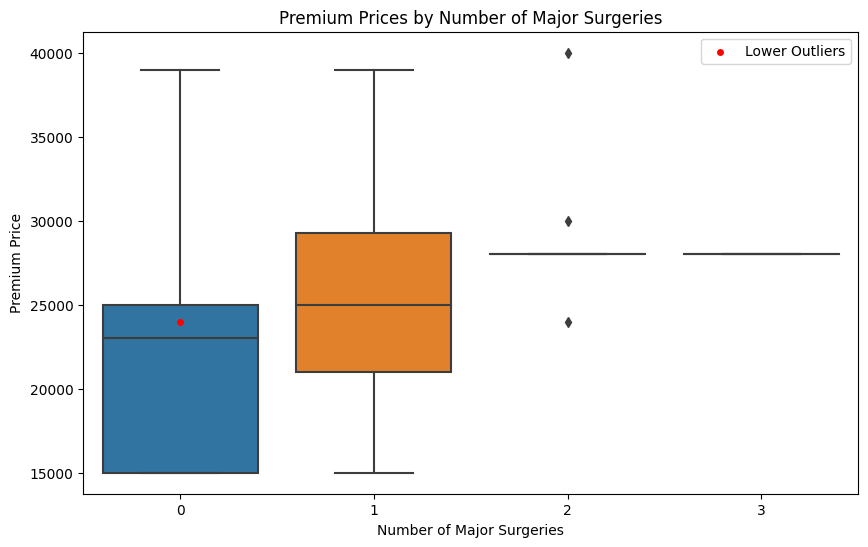

In [37]:
# Box plot for Premium Prices by Number of Major Surgeries with outliers highlighted
plt.figure(figsize=(10, 6))
sns.boxplot(x='NumberOfMajorSurgeries', y='PremiumPrice', data=df)
sns.swarmplot(x='NumberOfMajorSurgeries', y='PremiumPrice', data=lower_outliers, color='red', label='Lower Outliers')
plt.title('Premium Prices by Number of Major Surgeries')
plt.xlabel('Number of Major Surgeries')
plt.ylabel('Premium Price')
plt.legend()
plt.show()

In [38]:
#This plot is done to highlight the outliers on a graph

In [39]:
#Chi-square test
# Function to perform Chi-square test between two categorical variables

def chi_square_test(var1, var2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Contingency Table for {var1} and {var2}:")
    print(contingency_table)
    print(f"\nChi-square Test Results for {var1} and {var2}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    alpha = 0.05
    if p < alpha:
        print(f"Reject the null hypothesis: There is a significant association between {var1} and {var2}.\n")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant association between {var1} and {var2}.\n")

# List of health conditions to compare
health_conditions = [
    'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
    'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily','NumberOfMajorSurgeries'
]

# Perform Chi-square tests for each pair of health conditions
for i in range(len(health_conditions)):
    for j in range(i + 1, len(health_conditions)):
        chi_square_test(health_conditions[i], health_conditions[j])

Contingency Table for Diabetes and BloodPressureProblems:
BloodPressureProblems    0    1
Diabetes                       
0                      335  237
1                      189  225

Chi-square Test Results for Diabetes and BloodPressureProblems:
Chi-square statistic: 15.571225392078397
P-value: 7.945461025980538e-05
Degrees of freedom: 1
Expected frequencies:
[[303.98377282 268.01622718]
 [220.01622718 193.98377282]]
Reject the null hypothesis: There is a significant association between Diabetes and BloodPressureProblems.

Contingency Table for Diabetes and AnyTransplants:
AnyTransplants    0   1
Diabetes               
0               536  36
1               395  19

Chi-square Test Results for Diabetes and AnyTransplants:
Chi-square statistic: 1.0207290599382488
P-value: 0.3123461364949182
Degrees of freedom: 1
Expected frequencies:
[[540.09330629  31.90669371]
 [390.90669371  23.09330629]]
Fail to reject the null hypothesis: There is no significant association between Diabetes 

In [40]:
#Linear Regression
# Define the independent variable (age) and dependent variable (premium price)

#Hypothesis

#𝐻0: Age is not a significant predictor of premium price.
#H1: Age is a significant predictor of premium price.

X = df_cleaned_3['Age']
y = df_cleaned_3['PremiumPrice']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Interpret the p-value for the Age coefficient
p_value_age = model.pvalues['Age']
alpha = 0.05
if p_value_age < alpha:
    print("Reject the null hypothesis: Age is a significant predictor of premium price.")
else:
    print("Fail to reject the null hypothesis: Age is not a significant predictor of premium price.")

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     925.8
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          1.04e-142
Time:                        01:51:39   Log-Likelihood:                -9397.1
No. Observations:                 957   AIC:                         1.880e+04
Df Residuals:                     955   BIC:                         1.881e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.105e+04    457.540     24.151      0.0

In [41]:
# 8 significant association between health factors were found.

In [42]:
#Above regression proves that age is a significant predictor of premium price.

In [43]:
# Multliple Regression Analysis

#Hypothesis

#H0: Age, height, and weight are not significant predictors of premium price.
#H1: Age, height, and weight are significant predictors of premium price.

# Select the predictor variables and the target variable
X = df_cleaned_3[['Age', 'Height', 'Weight']]
y = df_cleaned_3['PremiumPrice']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Interpret the p-values for the coefficients
p_values = model.pvalues
alpha = 0.05

# Overall model significance
overall_p_value = model.f_pvalue

if overall_p_value < alpha:
    print("Reject the null hypothesis: The model is statistically significant overall.")
else:
    print("Fail to reject the null hypothesis: The model is not statistically significant overall.")

# Individual predictors' significance
significant_predictors = p_values[p_values < alpha].index.tolist()

if significant_predictors:
    print(f"Significant predictors: {significant_predictors}")
else:
    print("No significant predictors found.")

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     340.5
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          3.08e-150
Time:                        01:51:39   Log-Likelihood:                -9372.8
No. Observations:                 957   AIC:                         1.875e+04
Df Residuals:                     953   BIC:                         1.877e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6109.1800   2448.537      2.495      0.0

# ML Modelling

# Data Preprocessing 

# Feature Engineering

In [44]:
# Calculate BMI
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

In [45]:
df.dtypes

Age                          int64
Diabetes                     int64
BloodPressureProblems        int64
AnyTransplants               int64
AnyChronicDiseases           int64
Height                       int64
Weight                       int64
KnownAllergies               int64
HistoryOfCancerInFamily      int64
NumberOfMajorSurgeries       int64
PremiumPrice                 int64
BMI                        float64
dtype: object

In [75]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996,27.460709
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382,5.878671
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000,15.156281
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000,23.393392
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000,27.156602
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000,30.759870
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000,50.000000


# Scaling

In [46]:
# Define the features and target variable
X = df.drop('PremiumPrice', axis=1)
y = df['PremiumPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [47]:
X_train

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI
762,19,0,0,0,0,146,55,0,0,0,25.802214
334,31,0,1,0,0,162,87,0,0,0,33.150434
890,58,1,0,0,0,147,75,0,0,0,34.707761
529,31,0,1,0,0,171,85,0,0,0,29.068773
468,26,1,1,0,0,167,70,0,1,1,25.099502
...,...,...,...,...,...,...,...,...,...,...,...
106,60,0,0,0,0,155,58,0,0,0,24.141519
270,46,0,1,0,1,166,58,0,0,1,21.048048
860,61,1,0,0,0,161,66,0,0,3,25.461981
435,37,1,0,0,0,174,63,1,1,1,20.808561


In [48]:
X_test

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI
613,50,0,0,0,0,165,84,1,1,1,30.853994
451,39,0,0,0,1,185,73,1,1,1,21.329438
731,65,1,1,0,0,165,87,0,0,0,31.955923
436,29,0,0,0,0,179,70,0,1,1,21.847009
275,48,1,1,0,0,171,84,1,0,0,28.726788
...,...,...,...,...,...,...,...,...,...,...,...
209,49,1,0,0,0,160,110,1,1,1,42.968750
506,54,0,0,0,0,184,81,0,0,1,23.924858
49,20,0,0,0,0,160,83,0,0,0,32.421875
717,50,1,1,0,0,175,89,0,0,2,29.061224


In [49]:
y_train

762    15000
334    34000
890    29000
529    23000
468    15000
       ...  
106    25000
270    25000
860    28000
435    31000
102    31000
Name: PremiumPrice, Length: 788, dtype: int64

In [50]:
y_test

613    31000
451    31000
731    29000
436    15000
275    23000
       ...  
209    35000
506    29000
49     15000
717    28000
964    15000
Name: PremiumPrice, Length: 198, dtype: int64

In [51]:
# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# here you find an array of scaled numbers for both train and test sample.

# Model Selection

In [53]:
# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

In [54]:
# Linear Regression
print("Linear Regression:")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
evaluate_model(lr, X_test_scaled, y_test)

Linear Regression:
Mean Squared Error: 12210927.79297937
R-squared: 0.7136461439649742


In [55]:
# Decision Tree
print("\nDecision Tree:")
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
evaluate_model(dt, X_test_scaled, y_test)


Decision Tree:
Mean Squared Error: 16065656.565656565
R-squared: 0.6232503553124596


In [56]:
# Random Forest
print("\nRandom Forest:")
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
evaluate_model(rf, X_test_scaled, y_test)


Random Forest:
Mean Squared Error: 4529460.101010101
R-squared: 0.8937813417890521


In [57]:
# Gradient Boosting
print("\nGradient Boosting:")
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)
evaluate_model(gb, X_test_scaled, y_test)


Gradient Boosting:
Mean Squared Error: 5725274.915596395
R-squared: 0.8657387401894037


In [58]:
# Neural Network
print("\nNeural Network:")
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(random_state=42, max_iter=1000)
nn.fit(X_train_scaled, y_train)
evaluate_model(nn, X_test_scaled, y_test)


Neural Network:
Mean Squared Error: 437839262.6594303
R-squared: -9.267603192129712


C:\Users\Binu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [59]:
# Result shows Random Forest is the best with lowest MSE and highest R squared value.

In [60]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_
evaluate_model(best_rf, X_test_scaled, y_test)

# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train_scaled, y_train)

print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
best_gb = grid_search_gb.best_estimator_
evaluate_model(best_gb, X_test_scaled, y_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Mean Squared Error: 4127369.9325902294
R-squared: 0.903210606473346
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error: 5725274.915596395
R-squared: 0.8657387401894037


                    Feature  Random Forest Importance
0                       Age                  0.664185
3            AnyTransplants                  0.105569
6                    Weight                  0.075935
10                      BMI                  0.039216
4        AnyChronicDiseases                  0.038830
9    NumberOfMajorSurgeries                  0.030796
8   HistoryOfCancerInFamily                  0.022789
5                    Height                  0.015859
2     BloodPressureProblems                  0.005682
1                  Diabetes                  0.000617
7            KnownAllergies                  0.000520


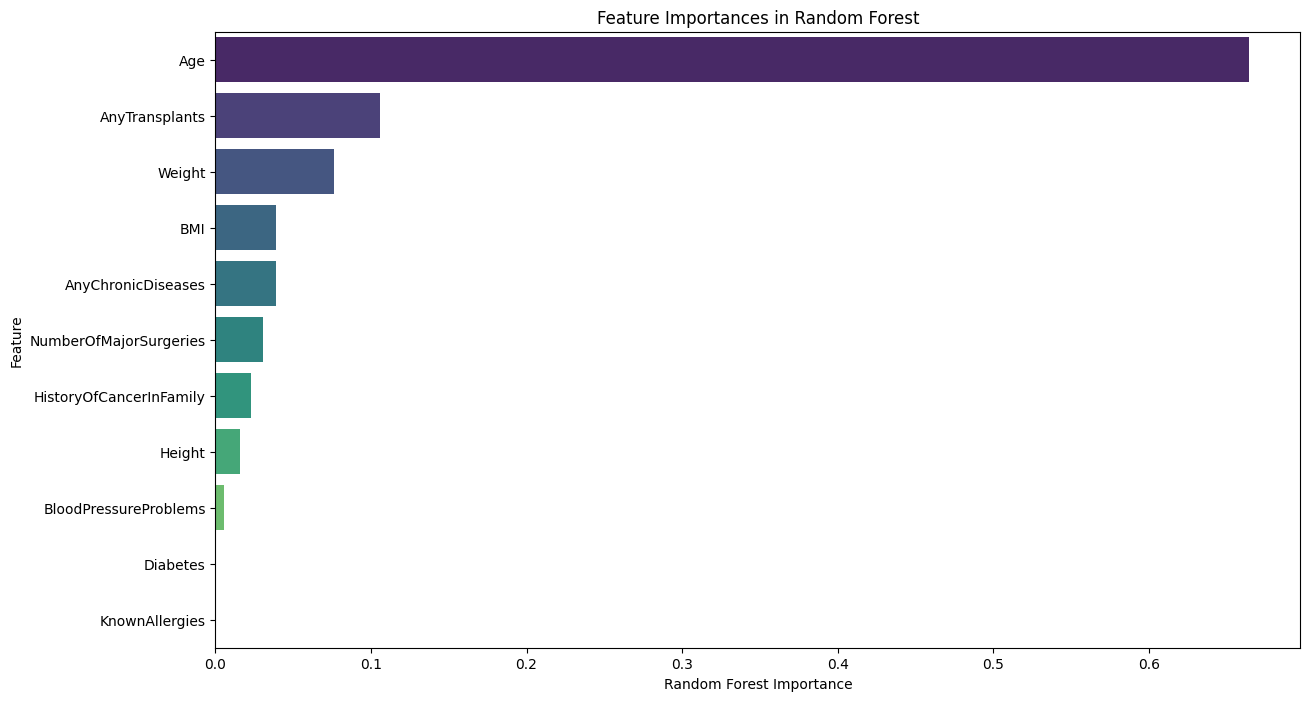

In [61]:
#Feature importance analysis
importances_rf = best_rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest Importance': importances_rf
})

feature_importance_df = feature_importance_df.sort_values(by='Random Forest Importance', ascending=False)
print(feature_importance_df)

# Plotting feature importances
plt.figure(figsize=(14, 8))
sns.barplot(x='Random Forest Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances in Random Forest')
plt.show()

In [62]:
#Age has the highest importance, indicating it is the most significant predictor for premium price.
#AnyTransplants and Weight also have considerable importance, suggesting their influence on premium prices.
#Features like BMI, AnyChronicDiseases, and NumberOfMajorSurgeries have moderate impact.
#Features like Diabetes and KnownAllergies have minimal importance.

In [88]:
import pickle
# Save the trained model as a .pkl file
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

In [89]:
# Load the trained model from the .pkl file
with open('best_rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [90]:
# Make predictions with the loaded model
predictions = loaded_model.predict(X)

C:\Users\Binu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


# Model Evaluation and Validation

# Cross Validation

In [64]:
# Define the model
model = RandomForestRegressor(n_estimators=300, max_depth=None, min_samples_split=10)

# Define the cross-validation procedure
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

# Convert negative MSE to positive and calculate RMSE
mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())

Cross-Validation RMSE Scores: [2226.37154287 1778.09540797 2672.32339681 3764.97471746 2952.97476448
 3914.92533882 2955.8645863  3084.10544703 1725.88216319 2718.05194717]
Mean RMSE: 2779.3569312082736
Standard Deviation of RMSE: 696.3094738854265


# Performance Metrics

In [65]:
# Fit the model on the whole dataset
model.fit(X, y)

# Predict on the same dataset (for demonstration; normally you'd use a separate test set)
y_pred = model.predict(X)

# Calculate performance metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 3633369.8954909276
Root Mean Squared Error: 1906.1400513841913
Mean Absolute Error: 698.9681068545847
R-squared: 0.9068371804247812


In [66]:
##Confidence Interval/Prediction Intervals

In [67]:
from sklearn.utils import resample


# Function to compute prediction intervals
def prediction_intervals(model, X, y, alpha=0.05, n_iterations=100):
    # Store predictions
    predictions = np.zeros((n_iterations, len(y)))
    
    for i in range(n_iterations):
        # Bootstrap sampling
        X_resampled, y_resampled = resample(X, y, random_state=i)
        model.fit(X_resampled, y_resampled)
        predictions[i] = model.predict(X)
    
    # Compute percentiles for prediction intervals
    lower = np.percentile(predictions, 100 * alpha / 2, axis=0)
    upper = np.percentile(predictions, 100 * (1 - alpha / 2), axis=0)
    
    return lower, upper

# Calculate prediction intervals
lower, upper = prediction_intervals(model, X, y)

# Example of how to access intervals for a specific instance
instance_index = 0
print(f"Prediction Interval for instance {instance_index}: ({lower[instance_index]}, {upper[instance_index]})")

Prediction Interval for instance 0: (23494.699938160964, 24973.831082561235)


# SHAP values

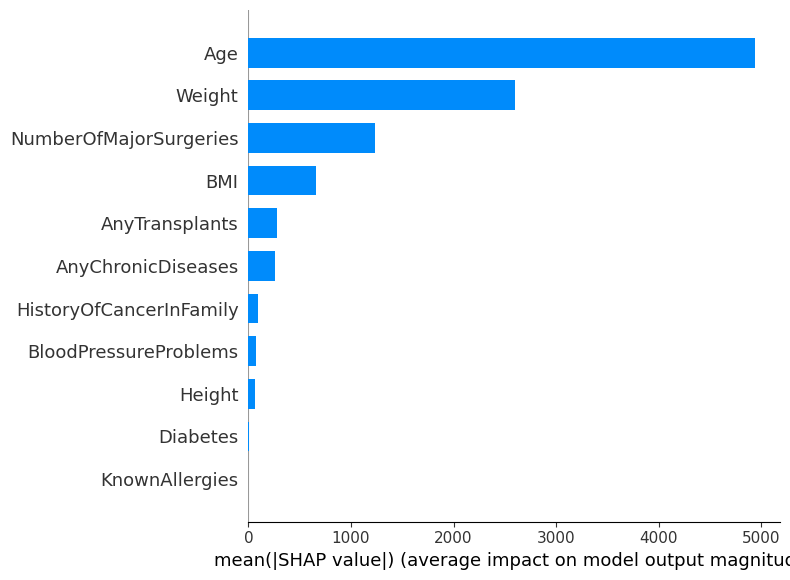

In [68]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# SHAP (SHapley Additive exPlanations) values provide a unified measure of feature importance based on game theory. They help explain the contribution of each feature to the prediction.

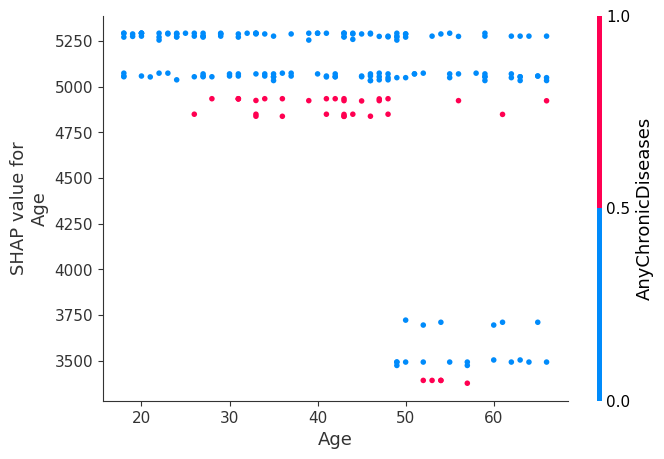

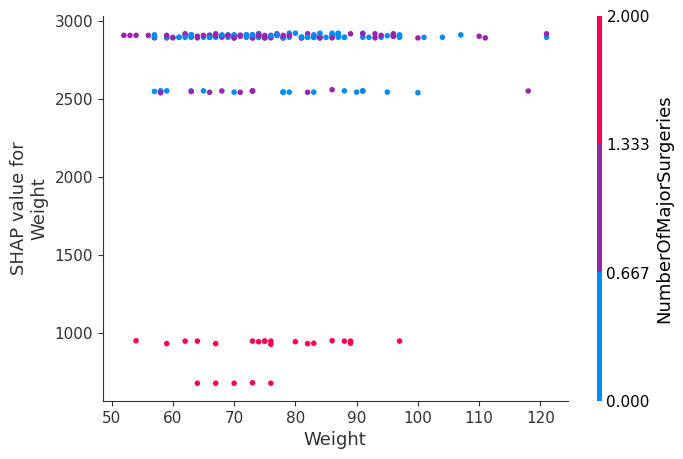

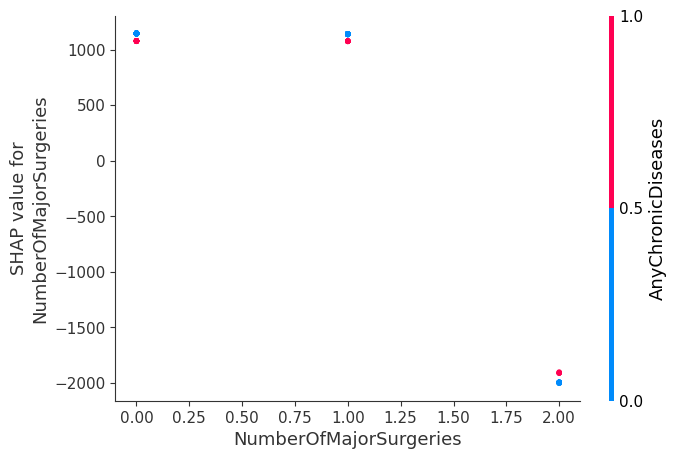

In [69]:
# SHAP dependence plots for important features
shap.dependence_plot('Age', shap_values, X_test)
shap.dependence_plot('Weight', shap_values, X_test)
shap.dependence_plot('NumberOfMajorSurgeries', shap_values, X_test)

In [ ]:
#Insights based on the importance of each feature:

#Age: Older individuals are likely to have higher insurance premiums.
#Insight: Targeted health programs and regular check-ups can be introduced for older clients to manage health risks better.
    
#BMI: Higher BMI is associated with higher premiums.
#Insight: Offer wellness programs and incentives for maintaining a healthy BMI to reduce future claims.
    
#Weight: Higher weight contributes to higher premiums.
#Insight: Weight management programs can be offered to customers.
    
#Number of Major Surgeries: More surgeries correlate with higher premiums.
#Insight: Monitor and support customers with a history of major surgeries with preventive care.
    
#Any Transplants: Individuals with transplants have higher premiums.
#Insight: Provide specialized care and regular follow-ups for transplant recipients.
    
#Health Monitoring Programs: Develop programs for regular health check-ups, especially for older customers, 
#    to identify and manage health risks early.

#Wellness and Fitness Initiatives: Provide incentives for customers to participate in fitness programs and 
#    maintain a healthy BMI.

#Preventive Care Plans: Offer comprehensive preventive care plans for customers with a history of surgeries and transplants
#    to reduce the likelihood of future claims.

#Personalized Insurance Plans: Customize insurance plans based on individual risk factors to provide fair and 
#    competitive premiums.

#Summary
#By analyzing the feature importances from the model, we can identify key risk factors contributing to
#higher insurance premiums. 
#Targeted interventions based on these insights can help manage risks more effectively and provide better value to customers.